In [1]:
#Library importing
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from  tensorflow.keras import datasets,layers,models
import cv2 as cv
import sklearn
import os
import scipy
# from sklearn.model_selection import train_test_split

In [2]:
#Menyiapkan datasets

train_mentah_dir = os.path.join('train/Pisang Mentah')
train_matang_dir = os.path.join('train/Pisang Matang')
train_setmatang_dir = os.path.join('train/Pisang SetMatang')

valid_mentah_dir = os.path.join('valid/Pisang Mentah')
valid_matang_dir = os.path.join('valid/Pisang Matang')
valid_setmatang_dir = os.path.join('valid/Pisang SetMatang')


In [3]:
# Mengecek banyaknya data

print('total training Pisang Mentah images:', len(os.listdir(train_mentah_dir)))
print('total training Pisang Matang images:', len(os.listdir(train_matang_dir)))
print('total training Pisang SetMatang images:', len(os.listdir(train_setmatang_dir)))

print('total validation Pisang Mentah images:', len(os.listdir(valid_mentah_dir)))
print('total validation Pisang Matang images:', len(os.listdir(valid_matang_dir)))
print('total validation Pisang SetMatang images:', len(os.listdir(valid_setmatang_dir)))


total training Pisang Mentah images: 281
total training Pisang Matang images: 330
total training Pisang SetMatang images: 88
total validation Pisang Mentah images: 16
total validation Pisang Matang images: 12
total validation Pisang SetMatang images: 10


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
nrows = 4
ncols = 4
pic_index = 0

In [6]:
train_mentah_names =os.listdir(train_mentah_dir)
train_matang_names = os.listdir(train_matang_dir)
train_setmatang_names = os.listdir(train_setmatang_dir)


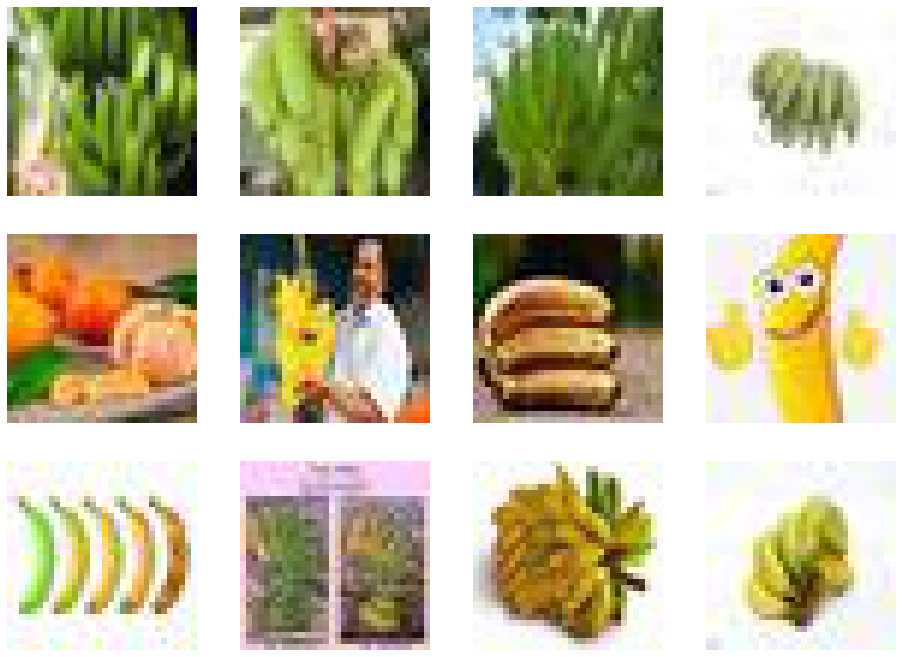

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_mentah_pic = [os.path.join(train_mentah_dir, fname) 
                for fname in train_mentah_names[pic_index-4:pic_index]]
next_matang_pic = [os.path.join(train_matang_dir, fname) 
                for fname in train_matang_names[pic_index-4:pic_index]]
next_setmatang_pic = [os.path.join(train_setmatang_dir, fname) 
                for fname in train_setmatang_names[pic_index-4:pic_index]]


for i, img_path in enumerate(next_mentah_pic + next_matang_pic + next_setmatang_pic):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)
 

plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1.0/255., rotation_range = 40,
                                    width_shift_range = 8.2, height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'train/',  # This is the source directory for training images
        classes = ['Pisang Mentah', 'Pisang Matang','Pisang SetMatang'],
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=3,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'valid/',  # This is the source directory for training images
        classes = ['Pisang Mentah', 'Pisang Matang','Pisang SetMatang'],
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=3,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 696 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator


In [10]:
from tensorflow.keras.applications import vgg16

model = vgg16.VGG16()
model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-06 23:13:50.382678: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-06 23:13:50.383446: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# Ketik code di atas di sini
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
import tensorflow as tf

base_model = VGG16(input_shape = (224, 224, 3),
                   include_top = False, # menghapus layer terakhir secara otomatis
                   weights = 'imagenet')

In [12]:
for layer in base_model.layers: # freezing all layer except the last layer
  layer.trainable = False

In [13]:
from tensorflow.keras import optimizers
from tensorflow.keras import layers

In [14]:
# Flatten
x = layers.Flatten()(base_model.output)

# Fully Connected Layer
x = layers.Dense(512, activation = 'relu')(x)

# Dropout
x = layers.Dropout(0.3)(x)

# Output layer
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [16]:
import time
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator,
                    #steps_per_epoch = 9, 
                    epochs = 5,
                    verbose = 1,
                    validation_steps = 1)

# print(f"Running time: --- {time.time() - start_time}%s seconds ---")

2022-04-06 23:14:03.214144: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-04-06 23:14:04.044626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


232/232 [==============================] - ETA: 0s - loss: 0.7778 - accuracy: 0.5057

2022-04-06 23:14:51.963766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


232/232 [==============================] - 49s 183ms/step - loss: 0.7778 - accuracy: 0.5057 - val_loss: 1.5067 - val_accuracy: 0.0000e+00
Epoch 2/5
232/232 [==============================] - 44s 188ms/step - loss: 0.6123 - accuracy: 0.5316 - val_loss: 0.5486 - val_accuracy: 1.0000
Epoch 3/5
232/232 [==============================] - 42s 181ms/step - loss: 0.5286 - accuracy: 0.5805 - val_loss: 0.5328 - val_accuracy: 1.0000
Epoch 4/5
232/232 [==============================] - 38s 164ms/step - loss: 0.4468 - accuracy: 0.6106 - val_loss: 0.6353 - val_accuracy: 0.6667
Epoch 5/5
232/232 [==============================] - 39s 168ms/step - loss: 0.3593 - accuracy: 0.6092 - val_loss: 0.2103 - val_accuracy: 1.0000


In [17]:
model.evaluate(validation_generator)

12/12 [==============================] - 4s 337ms/step - loss: 0.8037 - accuracy: 0.6571


[0.8036814332008362, 0.6571428775787354]

In [18]:
from tensorflow.keras.models import load_model

In [19]:
# model.save('cobamodel1.h5')

In [20]:
# model.evaluate(validation_generator)

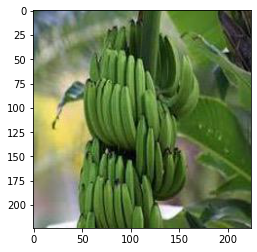

In [23]:
img = cv.imread('images 2.jpeg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)


In [25]:
class_names = ['Pisang Mentah','Pisang Matang','Pisang SetMatang']

In [26]:
predictions = model.predict(np.array([img]))
index = np.argmax(predictions)
print(f'Prediction is {class_names[index]}')

Prediction is Pisang Mentah
